In [1]:
from prices import (
    simulate_stock, 
    SimulationParams,
    optimize_and_simulate, 
    set_up_params
)
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import sys 
sys.path.append('../../../../')
from bin.main import get_path 
from main import Manager 
from tweets.Options.em.em_plot import exp_plots


manager = Manager(get_path('../../../../'))
e = exp_plots(get_path('../../../../'))

2025-04-19 01:17:49,629 - bin.options.optgd.db_connect - INFO - Options DB Initialized
2025-04-19 01:17:49,629 - bin.options.optgd.db_connect - WARNING - You currently have 8 connections open.
2025-04-19 01:17:49,631 - INFO - PriceDB Initialized successfully at 2025-04-19 01:17:49.631310
2025-04-19 01:17:49,631 - bin.price.db_connect - INFO - PriceDB Initialized successfully at 2025-04-19 01:17:49.631310
2025-04-19 01:17:49,631 - INFO - Established 3 database connections
2025-04-19 01:17:49,631 - bin.price.db_connect - INFO - Established 3 database connections
2025-04-19 01:17:49,715 - bin.alerts.options_alerts - INFO - Notifications instance initialized.
2025-04-19 01:17:49,721 - INFO - PriceDB Initialized successfully at 2025-04-19 01:17:49.721945
2025-04-19 01:17:49,721 - bin.price.db_connect - INFO - PriceDB Initialized successfully at 2025-04-19 01:17:49.721945
2025-04-19 01:17:49,722 - INFO - Established 3 database connections
2025-04-19 01:17:49,722 - bin.price.db_connect - INFO


                    
Calibrated Heston parameters for spy Days: 41:

                    (Mean reversion speed) kappa=2.0011, 
                    (Long term variance) theta=0.0400
                    (Initial Variance)v_0=0.0400, 
                    (Correlation between W_t) rho=-0.7000, 
                    (Volatility of Volatility) xi=0.1000
                    
Calibrated Heston parameters: kappa=2.0353, theta=0.0392, v_0=0.0406, rho=-0.7021, xi=0.1016


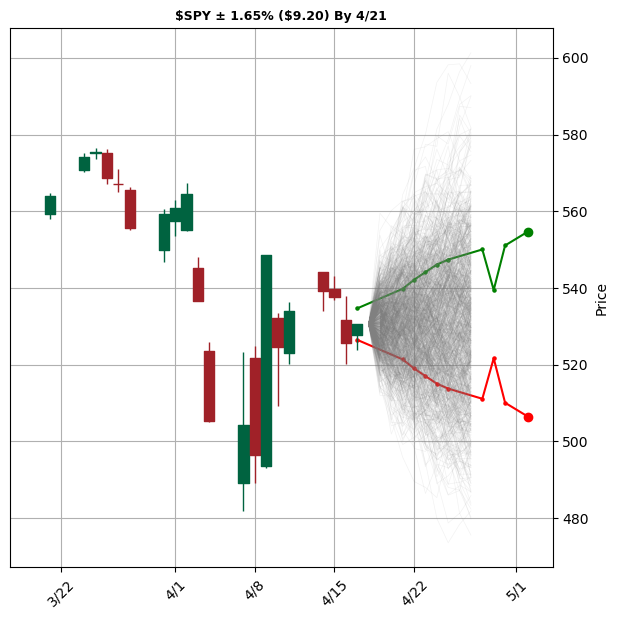

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
e.exp_move_plot('spy', fig = fig, ax = ax,method = 'heston_path')
plt.show()

In [ ]:
params = SimulationParams(
    S0 = 100, 
    r = 0.05,
    days = 252,
    mu = 0.1,
    sigma = 0.2,
    number_of_sims=1000,
    N = 1000,
    lam = 0.1,
    mj = 0.01, 
    sj = 0.01, 
    m = 0.02, 
    v = 0.003, 
    kappa = 0.01, 
    theta = 0.001, 
    rho = 0.5,
    xi=0.01,
)

df = manager.Pricedb.ohlc('amzn')["2022":]

params = set_up_params(stock = 'amzn', df = df)

class SimulationParams:
    """Dataclass to hold simulation parameters."""
    S0: float  # Initial stock price
    r: float = 0.0375  # Risk-free rate
    days: int = 10  # Number of days to simulate
    mu: float = 0.0  # Drift (expected return)
    sigma: float = 0.2  # Volatility
    number_of_sims: int = 1000  # Number of simulations
    N: int = 100  # Number of time steps (for GBM)
    lam: float = 0.005  # Jump intensity (for jump models)
    mj: float = 0.01  # Mean jump size (for Poisson jump)
    sj: float = 0.01  # Jump size volatility (for Poisson jump)
    m: float = 0.02  # Mean of log-jump size (for Merton jump)
    v: float = 0.003  # Variance of log-jump size (for Merton jump)
    kappa: float = 2.0  # Mean reversion speed (for Heston)
    theta: float = 0.04  # Long-term variance (for Heston)
    v_0: float = 0.04  # Initial variance (for Heston)
    rho: float = -0.7  # Correlation between Brownian motions (for Heston)
    xi: float = 0.1  # Volatility of volatility (for Heston)

In [4]:
# df = manager.Pricedb.get_multi_frame('spy', ma = 'sma', start_date = "2024-01-01", daily = True)
df = manager.Pricedb.ohlc('spy')
df = manager.Pricedb.get_moving_averages(df, ma = 'kama').dropna()

In [10]:
x = optimize_and_simulate(
    stock = 'spy', 
    df = df.copy(), 
    method = 'heston_path', 
    days = 15, 
)

start_date = df.index[-1] + pd.Timedelta(days = 1)
end_date = df.index[-1] + pd.Timedelta(days = x[:, 1].shape[0])
new_index = pd.date_range(start_date, end_date)


Calibrated Heston parameters: kappa=1.9950, theta=0.0391, v_0=0.0406, rho=-0.7187, xi=0.0994


In [11]:
pahts = pd.DataFrame(
    x[:, :], 
    index = new_index
)


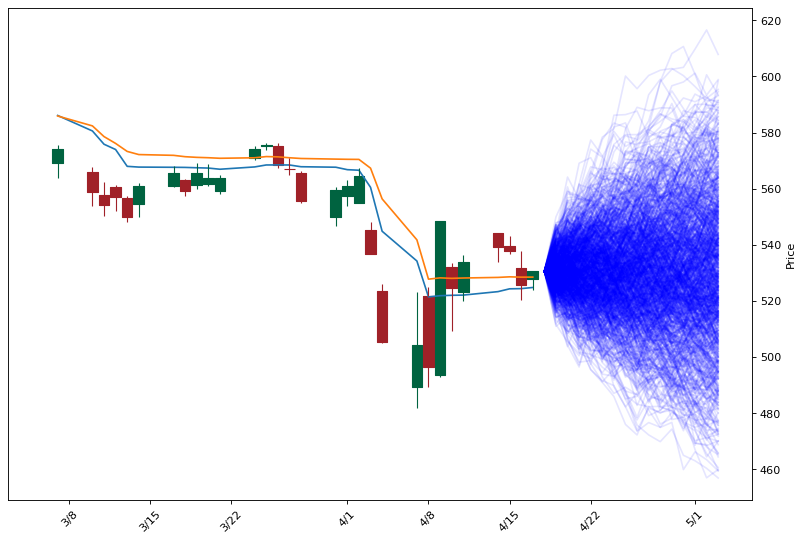

In [12]:
import matplotlib.pyplot as plt 
import mplfinance as mpf

n = 30
fig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi = 80)
ax.plot(df.KAMA6D.tail(n))
ax.plot(df.KAMA10D.tail(n))
# Add the simulated paths
for i in range(pahts.shape[1]):
    ax.plot(pahts.iloc[:, i], color = 'blue', alpha = 0.1)
mpf.plot(
        df.tail(n), 
        type = 'candle', 
        volume = False, 
        ylabel = 'Price',
        ylabel_lower = 'Volume',
        style = 'charles', 
        show_nontrading = True,
        datetime_format = '%-m/%-d',
        ax=ax
        )

